## Mental Rotation

In this experiment, 54 subjects performed a mental rotation task similar to Shepard & Metzler (1971): multiple pairs of 3D objects were presented at four different rotating angles. Data was obtained from Ganis & Kievit (2015).

The goal is to analyze the relationship between subjects' reaction times (dependent variable) and angles (independent variable) both within subjects and across subjects


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import linregress

In [2]:
nsubject = 54

The four angles (in degrees) at which 3D objects were presented.

In [3]:
unique_angles = [0,50,100,150] 

Create place-holder variable for recording mean response times (see below).

In [4]:
rt_matrix = np.zeros((nsubject,4))

Create place-holder variable for recording slopes (see below).

In [5]:
slopes = np.zeros(nsubject)

Create a meta figure that visualizes results for individual subjects, then begin analysis.

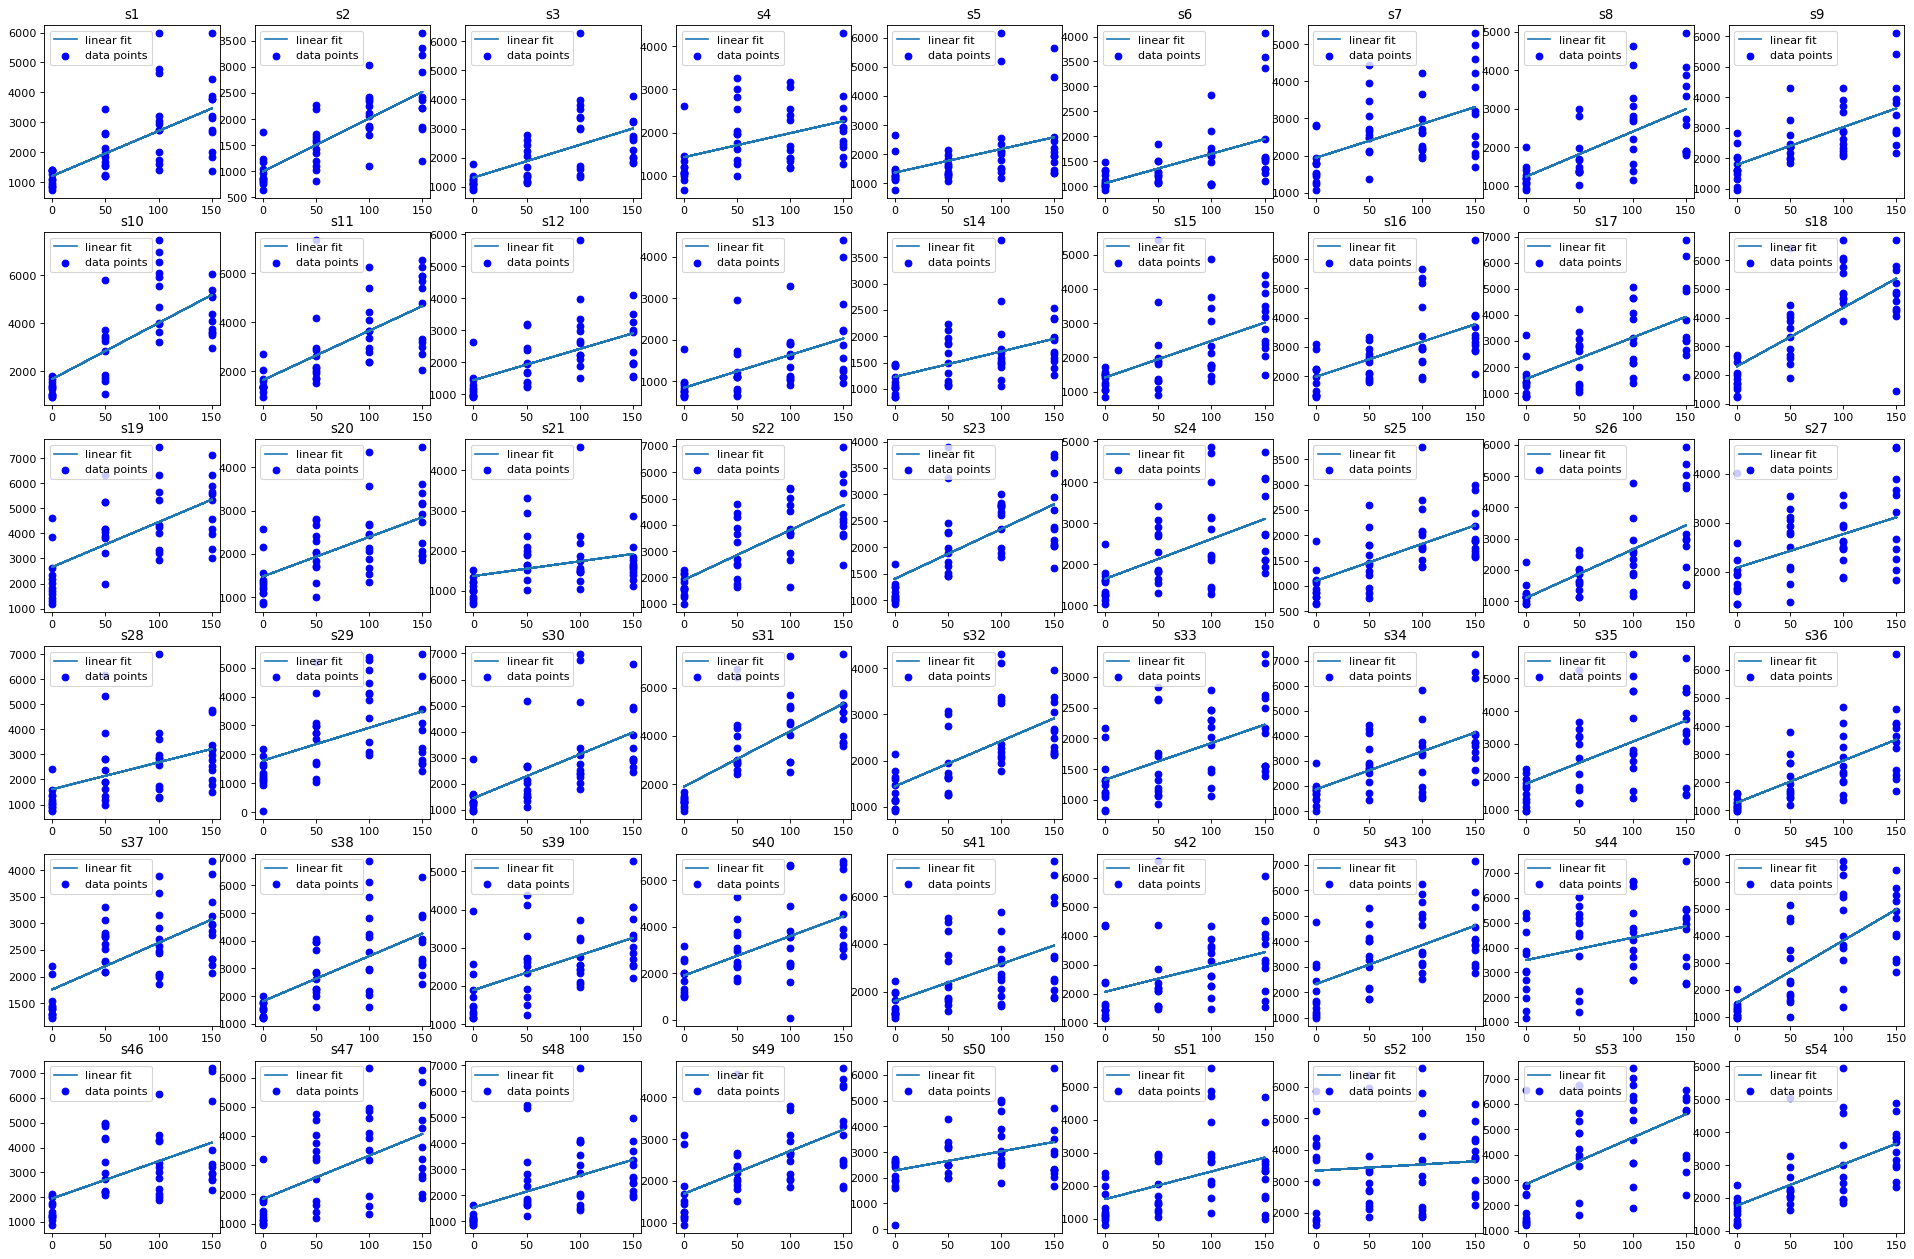

In [6]:
fig = plt.figure(figsize=(30, 20), dpi= 80, facecolor='w', edgecolor='k')

# Loop over the subjects
for s in range(0,nsubject):
    
    # Specify the file name of the subject in question
    fn_in = 'data-mental-rotation/sub'+str(s+1)

    # Read in experimental data
    with open(fn_in+'.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
        stimuli, rt, angle, acc, ind_stimuli = pickle.load(f)
        
    # Focus on trials where stimulus pair is matched
    inds= np.where(ind_stimuli==0)
    
    # Record the reaction time (rt) for each trial in a vector
    rt = np.float32(rt[inds])
    # Record the angle of the object pair for each trial in a vector
    angle = np.float32(angle[inds])
    
    # Fit a line (linear regression) between reaction time (rt) and angle
    # i.e. rt = angle x slope + intercept
    
    clean_indices = np.isfinite(angle) & np.isfinite(rt) # get indices where both x and y values are not NaNs
    angle = angle[clean_indices]
    rt = rt[clean_indices]
    slope, intercept = np.polyfit(angle, rt, 1)
    
    # Record the slope for this subject in place-holder variable "slopes"
    
    slopes[s] = slope
    
    # Create a subplot for this subject
    plt.subplot(6,9,s+1)
    
    # Scatter plot reaction times (y-axis) against angles (x-axis)

    plt.scatter(angle, rt, color = 'b', label='data points')
    
    
    # Juxtapose the fitted line onto this scatter plot
    
    fitted_line = slope*angle + intercept
    plt.plot(angle, fitted_line, label='linear fit')
    plt.legend(loc='upper left')
    
    # Specify title of the plot by subject index
    plt.title('s'+str(s+1))
        
    # Calculate within-subject mean response time across trials, for each angle
    means = np.zeros(4) # new temporary array to store means
    for i in range(4):
        a = unique_angles[i] # get a single unique angle
        angle_index = np.where(angle==float(a))[0] # get indices for this angle
        means[i] = np.nanmean(rt[angle_index]) # find means for exactly these responses and store in the temporary array
        
    # Record this value in place-holder variable "rt_matrix"
    
    rt_matrix[s] = means # assign it to the global matrix
    
plt.show()

Take the average of mean response times across subjects, for each angle.

In [7]:
mean_angles = np.zeros(4)
for i in range(4):
    mean_angles[i] = np.mean(rt_matrix[:,i])
mean_angles

array([1537.90277552, 2508.85030337, 3120.91149676, 3353.57024694])

Take the standard deviation of mean response times across subjects, for each angle.

In [8]:
std_angles = np.zeros(4)
for i in range(4):
    std_angles[i] = np.std(rt_matrix[:,i])
std_angles

array([478.46774874, 729.36486799, 889.53126205, 865.22197137])

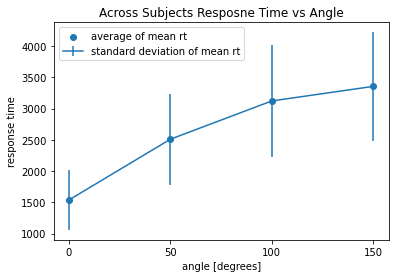

In [9]:
# Plot the average and standard deviation values calculated above, against the four angles.
plt.figure()
plt.scatter(unique_angles, mean_angles, label='average of mean rt')
plt.title('Across Subjects Resposne Time vs Angle')
plt.errorbar(unique_angles, mean_angles, yerr=std_angles, label='standard deviation of mean rt')
plt.xticks(unique_angles)
plt.xlabel('angle [degrees]')
plt.ylabel('response time')
plt.legend(loc='upper left')
plt.show()

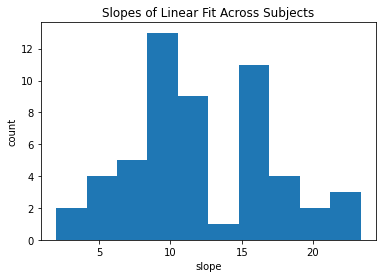

In [10]:
# Plot a histogram of slopes (across subjects) from the line fits computed earlier
plt.hist(slopes)
plt.title('Slopes of Linear Fit Across Subjects')
plt.xlabel('slope')
plt.ylabel('count')
plt.show()